In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os 
import csv
import sys

In [2]:
eyes_cascade = cv2.CascadeClassifier("Train/third-party/frontalEyes35x16.xml")
nose_cascade = cv2.CascadeClassifier("Train/third-party/Nose18x15.xml")

In [3]:
img = cv2.imread("Test/Before.png")

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def plot():
    plt.imshow(img)
    plt.show()

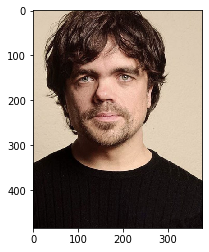

In [5]:
plot()

In [6]:
eyes = eyes_cascade.detectMultiScale(img)
nose = nose_cascade.detectMultiScale(img)

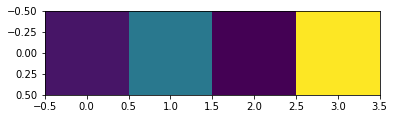

In [7]:
plt.imshow(eyes)

In [8]:
# for (ex,ey,ew,eh) in eyes: 
#     cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)

In [9]:
# for (nx, ny, nw, nh) in nose:
#     cv2.rectangle(img, (nx, ny), (nx+nw, ny+nh), (0, 255, 0), 2)

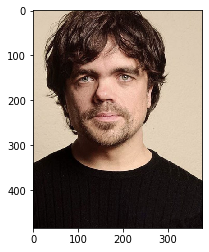

In [10]:
plot()

In [15]:
plt.imshow(img)
for (ex,ey,ew,eh) in eyes: 
    cv2.rectangle(img,(ex,ey), (ex+ew,ey+eh), (0,127,255),2)?
for (nx, ny, nw, nh) in nose:
    cv2.rectangle(img, (nx, ny), (nx+nw, ny+nh), (0, 255, 0), 2)

SyntaxError: invalid syntax (<ipython-input-15-4284e08d444c>, line 3)

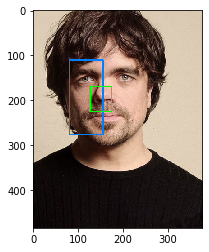

In [16]:
plot()

In [18]:
glasses = cv2.imread("Train/glasses.png")
mustache = cv2.imread("Train/mustache.png")

In [19]:
glasses = cv2.cvtColor(glasses, cv2.COLOR_BGR2RGBA)
mustache = cv2.cvtColor(mustache, cv2.COLOR_BGR2RGBA)

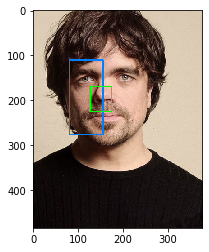

In [23]:
plt.imshow(img)
# plt.imshow(glasses)
# plt.imshow(mustache)
plt.show()